1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression

In [2]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110]) 
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [3]:
n = len(ks)
n

10

In [4]:
b1 = (np.mean(zp * ks) - np.mean(zp) * np.mean(ks)) / (np.mean(zp ** 2) - np.mean(zp) ** 2)
b0 = np.mean(ks) - b1 * np.mean(zp)
b1, b0

(2.620538882402765, 444.1773573243596)

2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [5]:
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])         # zp
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])    # ks

In [14]:
def mse_(B1, y = y, x = x, n = 10):
    return np.sum((B1*x - y) ** 2) / n
alpha = 1e-6
B1 = 0.1
n = 8
for i in range (301):
    B1 -= alpha * (2/n) * np.sum((B1*x - y) * x)
    if i % 60 == 0:
        print('Iteranion = {i}, B1 = {B1}, mse = {mse}'.format(i=i, B1=B1, mse=mse_(B1)))

Iteranion = 0, B1 = 0.2994101, mse = 487072.63368186494
Iteranion = 60, B1 = 5.207231604696927, mse = 62935.75508765133
Iteranion = 120, B1 = 5.806476360524031, mse = 56612.55387923855
Iteranion = 180, B1 = 5.879644114698183, mse = 56518.285081734786
Iteranion = 240, B1 = 5.888577893757293, mse = 56516.87968502355
Iteranion = 300, B1 = 5.889668707725519, mse = 56516.85873281065


3. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

Я не понял разницы, поэтому сделал следующее по лекции решение "Python для построения линейной регрессии"

In [16]:
zp = zp.reshape(-1, 1)

model = LinearRegression()
model.fit(zp, ks)
r_sq = model.score(zp, ks)

print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.7876386635293686
intercept: 444.17735732435943
slope: [2.62053888]


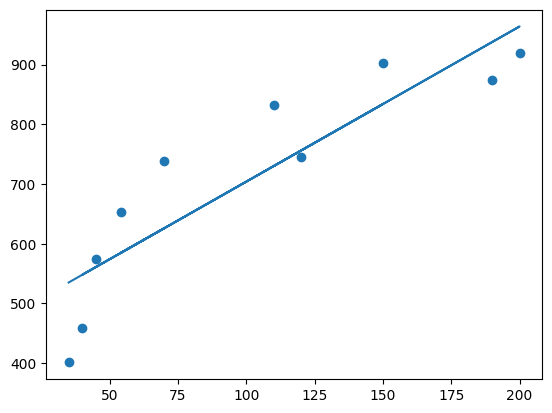

In [18]:
plt.scatter(zp, ks)
plt.plot(zp, 444+2.6*zp)
plt.show()